# Manual perceptron

In [78]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import polars as pl

In [79]:
# Parameters
w1 = 55
w2 = 1.0
b = -100

x1_range = (0, 3.5)
x2_range = (30, 200)

In [80]:
x1_ax = np.linspace(start=x1_range[0], stop=x1_range[1])
x2_ax = np.linspace(start=x2_range[0], stop=x2_range[1])
x1_grid, x2_grid = np.meshgrid(x1_ax, x2_ax)

In [81]:
# Read data from CSV file
df = pl.read_csv("simple_acc_hr_dataset.csv")

In [82]:
# Show example data
df

acceleration (m/s2),heart_rate (bpm),state,state_int
f64,f64,str,i64
1.21816,139.38765,"""exercise""",1
2.15473,114.286925,"""exercise""",1
2.260623,131.867242,"""exercise""",1
0.406301,73.804227,"""rest""",0
0.34022,68.650525,"""rest""",0
…,…,…,…
1.994108,125.014088,"""exercise""",1
1.616226,134.184749,"""exercise""",1
0.369476,77.441296,"""rest""",0


## To do
- Multiply weights with data
- Classify

In [83]:
X = df.select(pl.col(["acceleration (m/s2)", "heart_rate (bpm)"])).to_numpy()
y = df.select(pl.col("state_int")).to_numpy().flatten()

In [86]:
# Use weights to calculate "logit" z for points and for grid
z = X @ np.array([w1, w2]) + b
y_pred = z > 0
z_grid = x1_grid * w1 + x2_grid * w2 + b

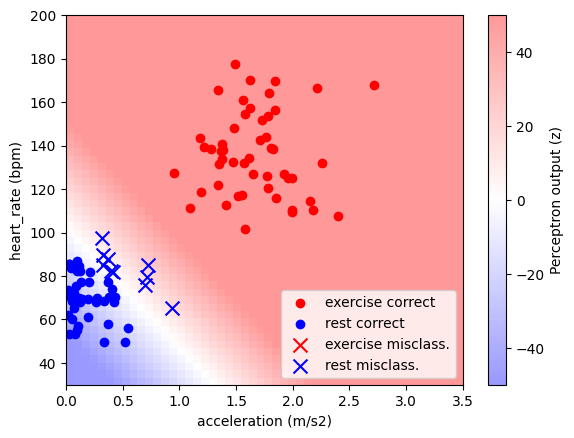

In [94]:
im_handle = plt.imshow(
    z_grid,
    extent=(x1_range[0], x1_range[1], x2_range[0], x2_range[1]),
    origin="lower",
    alpha=0.4,
    aspect="auto",
    vmin=-50,
    vmax=50,
    cmap="bwr",
)
exercise_correct = (y == 1) & (y_pred == 1)
rest_correct = (y == 0) & (y_pred == 0)
exercise_incorrect = (y == 1) & (y_pred == 0)
rest_incorrect = (y == 0) & (y_pred == 1)

plt.scatter(
    X[exercise_correct, 0],
    X[exercise_correct, 1],
    marker="o",
    color="r",
    label="exercise correct",
)
plt.scatter(
    X[rest_correct, 0], X[rest_correct, 1], marker="o", color="b", label="rest correct"
)
plt.scatter(
    X[exercise_incorrect, 0],
    X[exercise_incorrect, 1],
    marker="x",
    color="r",
    s=100,
    label="exercise misclass.",
)
plt.scatter(
    X[rest_incorrect, 0],
    X[rest_incorrect, 1],
    marker="x",
    color="b",
    s=100,
    label="rest misclass.",
)
plt.legend()

# scatter_handle = plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolor="k")
plt.xlabel("acceleration (m/s2)")
plt.ylabel("heart_rate (bpm)")
plt.colorbar(im_handle, label="Perceptron output (z)")
plt.show()